In [2]:
import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoup
import re
from time import sleep
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 한국은행경제통계시스템 api
# 통합재정수지 - 재산세 코드 028Y009 - A010102
# 조세징수액 - 종합부동산세 코드 085Y050 - G2AAH

## 통합재정수지 - 재산세

In [4]:
urll = 'http://ecos.bok.or.kr/api/StatisticSearch/CDFMS9PHEOO7QULTNTI4/xml/kr/1/10000/028Y009/MM/2010/2021/A010102'
a = requests.get(urll)
a

<Response [200]>

In [5]:
jaesan_xml = BeautifulSoup(a.text,'xml')
jaesan_raw = jaesan_xml.find_all('row')

In [6]:
jaesan_data_list = []
jaesan_time_list = []
for itter in jaesan_raw:
    jaesan_data_list.append(itter.find('DATA_VALUE').text)
    jaesan_time_list.append(itter.find('TIME').text)

In [7]:
jaesan_df = pd.DataFrame({
    'time' : jaesan_time_list,
    'taxx' : jaesan_data_list
})
jaesan_df['time'] = pd.to_datetime(jaesan_df['time'],format='%Y%m')
jaesan_df['taxx'] = jaesan_df['taxx'].astype(int)
jaesan_df

,time,taxx
0,2010-01-01,387
1,2010-02-01,1214
2,2010-03-01,1871
3,2010-04-01,2372
4,2010-05-01,2944
...,...,...
127,2020-08-01,12098
128,2020-09-01,14011
129,2020-10-01,16284
130,2020-11-01,18128


<AxesSubplot:xlabel='time', ylabel='taxx'>

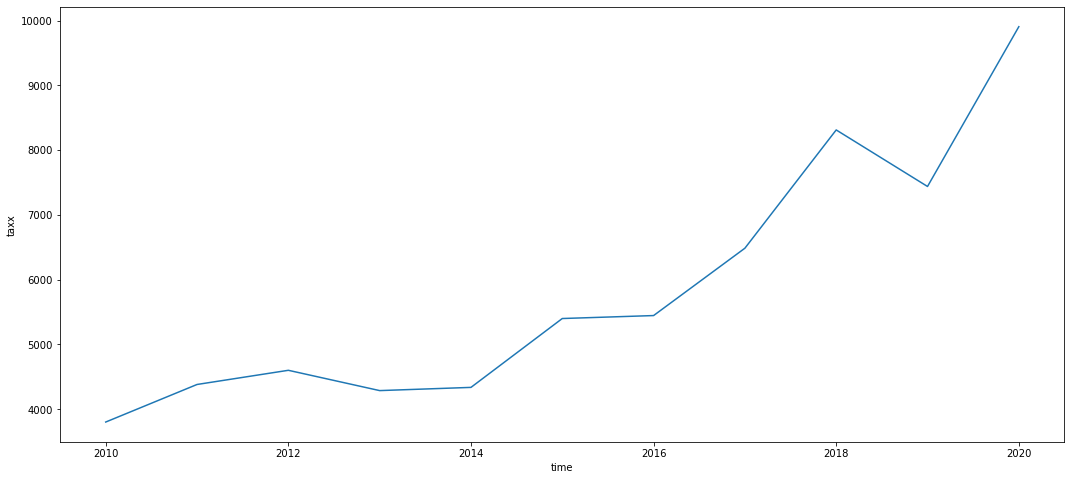

In [8]:
plt.figure(figsize=(18,8))
sns.lineplot(x=jaesan_df['time'].dt.year,y='taxx',data=jaesan_df,ci=None)

## 통합재정수지 - 종합부동산세

In [9]:
urll = 'http://ecos.bok.or.kr/api/StatisticSearch/CDFMS9PHEOO7QULTNTI4/xml/kr/1/100000/085Y050/YY/2000/2021/G2AAH'
b = requests.get(urll)
b

<Response [200]>

In [10]:
 b.text

'<?xml version="1.0" encoding="UTF-8"?><StatisticSearch>\n<list_total_count>15</list_total_count>\n<row>\n<STAT_CODE>085Y050</STAT_CODE>\n<STAT_NAME>6.4.2 조세징수액</STAT_NAME>\n<ITEM_CODE1>G2AAH</ITEM_CODE1>\n<ITEM_NAME1>종합부동산세</ITEM_NAME1>\n<ITEM_CODE2> </ITEM_CODE2>\n<ITEM_NAME2> </ITEM_NAME2>\n<ITEM_CODE3> </ITEM_CODE3>\n<ITEM_NAME3> </ITEM_NAME3>\n<UNIT_NAME>억원 </UNIT_NAME>\n<TIME>2005</TIME>\n<DATA_VALUE>4413</DATA_VALUE>\n</row>\n<row>\n<STAT_CODE>085Y050</STAT_CODE>\n<STAT_NAME>6.4.2 조세징수액</STAT_NAME>\n<ITEM_CODE1>G2AAH</ITEM_CODE1>\n<ITEM_NAME1>종합부동산세</ITEM_NAME1>\n<ITEM_CODE2> </ITEM_CODE2>\n<ITEM_NAME2> </ITEM_NAME2>\n<ITEM_CODE3> </ITEM_CODE3>\n<ITEM_NAME3> </ITEM_NAME3>\n<UNIT_NAME>억원 </UNIT_NAME>\n<TIME>2006</TIME>\n<DATA_VALUE>13275</DATA_VALUE>\n</row>\n<row>\n<STAT_CODE>085Y050</STAT_CODE>\n<STAT_NAME>6.4.2 조세징수액</STAT_NAME>\n<ITEM_CODE1>G2AAH</ITEM_CODE1>\n<ITEM_NAME1>종합부동산세</ITEM_NAME1>\n<ITEM_CODE2> </ITEM_CODE2>\n<ITEM_NAME2> </ITEM_NAME2>\n<ITEM_CODE3> </ITEM_CODE3>\n

In [11]:
jongbu_xml = BeautifulSoup(b.text,'xml')
jongbu_raw = jongbu_xml.find_all('row')

In [12]:
jongbu_data_list = []
jongbu_time_list = []
for itter in jongbu_raw:
    jongbu_data_list.append(itter.find('DATA_VALUE').text)
    jongbu_time_list.append(itter.find('TIME').text)

In [13]:
jongbu_df = pd.DataFrame({
    'time' : jongbu_time_list,
    'taxx' : jongbu_data_list
})
jongbu_df['taxx'] = jongbu_df['taxx'].astype(int)
jongbu_df

,time,taxx
0,2005,4413
1,2006,13275
2,2007,24143
3,2008,21299
4,2009,12071
5,2010,10289
6,2011,11019
7,2012,11311
8,2013,12243
9,2014,13072


<AxesSubplot:xlabel='time', ylabel='taxx'>

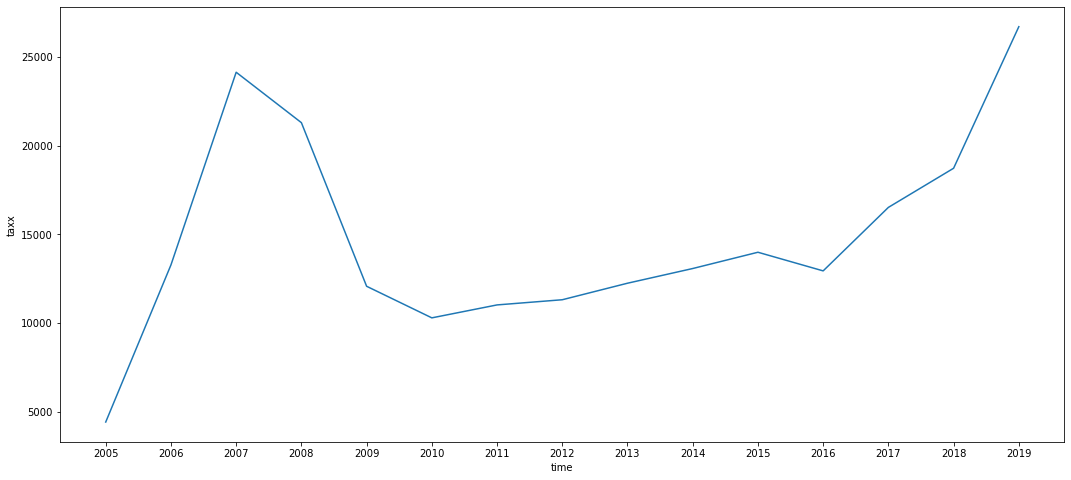

In [14]:
plt.figure(figsize=(18,8))
sns.lineplot(x=jongbu_df['time'],y='taxx',data=jongbu_df)

In [16]:
dirr = 'C:/Users/shic/Desktop/crawler_project/data_save/taxx/'
jongbu_df.to_csv(dirr+'jongbu_df.csv',index=False)
jaesan_df.to_csv(dirr+'jaesan_df.csv',index=False)